In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('college_cutoff.csv')
df.dropna(inplace=True)

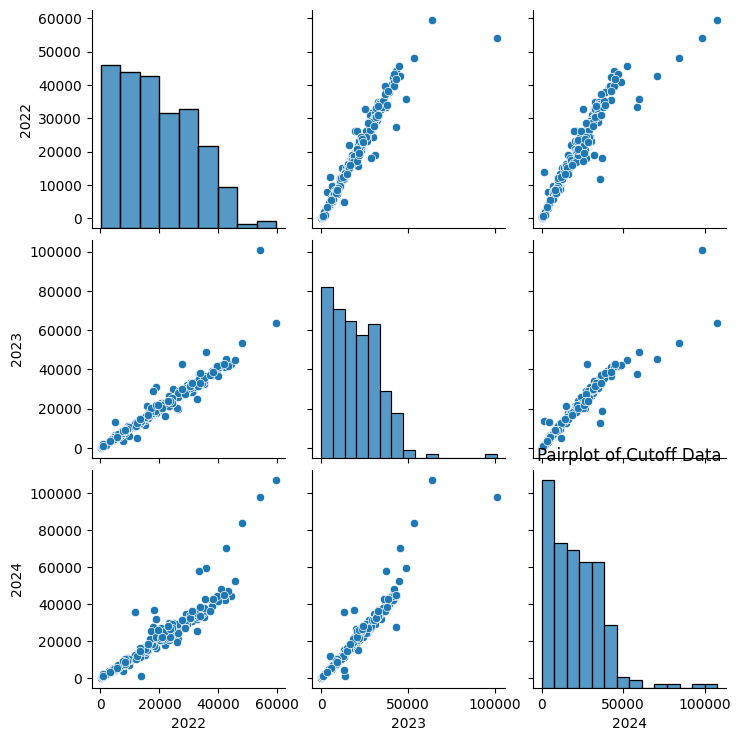

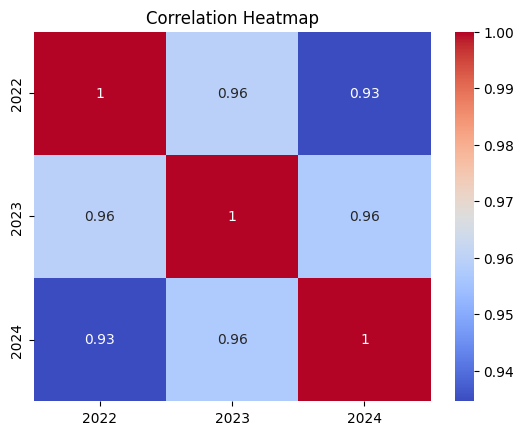

In [3]:
sns.pairplot(df[['2022', '2023', '2024']])
plt.title('Pairplot of Cutoff Data')
plt.show()

sns.heatmap(df[['2022', '2023', '2024']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Using the Linear Regession Model

In [ ]:
df2 = df
df2.dropna(inplace=True)
X_linear = df2[['2022', '2023']]
y_linear = df2['2024']

X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)

model_linear = LinearRegression()
model_linear.fit(X_train_linear, y_train_linear)

y_pred_linear = model_linear.predict(X_test_linear)

mse_linear = mean_squared_error(y_test_linear, y_pred_linear)
rscore = r2_score(y_test_linear, y_pred_linear)
print(f'Mean Squared Error: {mse_linear}')
print(f'R2 Score: {rscore}')

df2['2025'] = model_linear.predict(df2[['2022', '2023']])
df2.head(10)

Mean Squared Error: 14881356.478373745
R2 Score: 0.9549823670110926


,College Name,Courses,2022,2023,2024,2025
0,Indian Institute of Information Bombay,Computer Science Enginnering,68.0,61.0,66.0,-1650.139451
1,Indian Institute of Information Bombay,Electrical Engineering,470.0,475.0,464.0,-1172.454726
2,Indian Institute of Information Bombay,Mechanical Engineering,1700.0,1720.0,1685.0,267.695053
3,Indian Institute of Information Bombay,Electronics and Communication Engineering,410.0,405.0,400.0,-1251.848952
4,Indian Institute of Information Bombay,Chemical Engineering,2550.0,2600.0,2529.0,1282.289271
5,National Institute of Technology Rourkela,Computer Science Enginnering,7794.0,3546.0,3786.0,3119.252268
6,National Institute of Technology Rourkela,Electrical Engineering,14970.0,11759.0,12520.0,12457.950832
7,National Institute of Technology Rourkela,Mechanical Engineering,21900.0,16228.0,17907.0,18060.859814
8,National Institute of Technology Rourkela,Electronics and Communication Engineering,9566.0,6127.0,6770.0,5970.752070
9,National Institute of Technology Rourkela,Chemical Engineering,26213.0,19767.0,21037.0,22295.326063


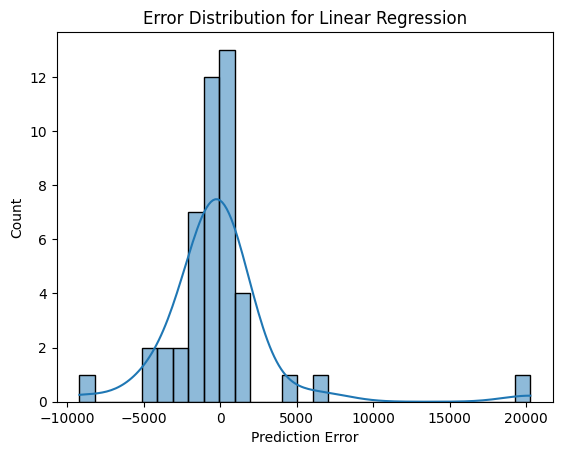

In [12]:
errors_linear = y_test_linear - y_pred_linear
sns.histplot(errors_linear, kde=True)
plt.title('Error Distribution for Linear Regression')
plt.xlabel('Prediction Error')
plt.show()

### Using Random Forest Regressor

In [5]:
X = df[['2022', '2023']]
y = df['2024']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [15]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')
crosss = cross_val_score(model, X_scaled, y, cv=5)
print(f'Cross Validation Score: {crosss}')
print(f'Average Cross Validation Score: {crosss.mean()}')

Mean Squared Error: 19706416.869787745
R^2 Score: 0.9403860633632597
Cross Validation Score: [0.98420123 0.82091568 0.68277027 0.9416713  0.93092605]
Average Cross Validation Score: 0.8720969061194112


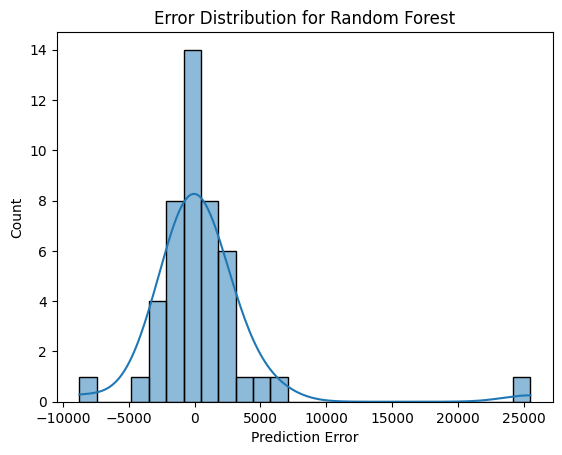

In [13]:
errors = y_test - y_pred
sns.histplot(errors, kde=True)
plt.title('Error Distribution for Random Forest')
plt.xlabel('Prediction Error')
plt.show()

In [10]:
df['2025'] = model.predict(scaler.transform(df[['2022', '2023']]))

In [11]:
df.head()

,College Name,Courses,2022,2023,2024,2025
0,Indian Institute of Information Bombay,Computer Science Enginnering,68.0,61.0,66.0,185.55
1,Indian Institute of Information Bombay,Electrical Engineering,470.0,475.0,464.0,502.54
2,Indian Institute of Information Bombay,Mechanical Engineering,1700.0,1720.0,1685.0,1792.05
3,Indian Institute of Information Bombay,Electronics and Communication Engineering,410.0,405.0,400.0,443.19
4,Indian Institute of Information Bombay,Chemical Engineering,2550.0,2600.0,2529.0,2398.03


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226 entries, 0 to 308
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   College Name  226 non-null    object 
 1   Courses       226 non-null    object 
 2   2022          226 non-null    float64
 3   2023          226 non-null    float64
 4   2024          226 non-null    float64
 5   2025          226 non-null    float64
dtypes: float64(4), object(2)
memory usage: 12.4+ KB


In [7]:
df[['2022', '2023', '2024', '2025']] = df[['2022', '2023', '2024', '2025']].astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226 entries, 0 to 308
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   College Name  226 non-null    object
 1   Courses       226 non-null    object
 2   2022          226 non-null    int64 
 3   2023          226 non-null    int64 
 4   2024          226 non-null    int64 
 5   2025          226 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 12.4+ KB


In [9]:
df.head()

,College Name,Courses,2022,2023,2024,2025
0,Indian Institute of Information Bombay,Computer Science Enginnering,68,61,66,185
1,Indian Institute of Information Bombay,Electrical Engineering,470,475,464,502
2,Indian Institute of Information Bombay,Mechanical Engineering,1700,1720,1685,1792
3,Indian Institute of Information Bombay,Electronics and Communication Engineering,410,405,400,443
4,Indian Institute of Information Bombay,Chemical Engineering,2550,2600,2529,2398


In [10]:
df.to_csv('college.csv', index=False)